In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [17]:
df=pd.read_excel("data/sentiment.xlsx")

In [ ]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

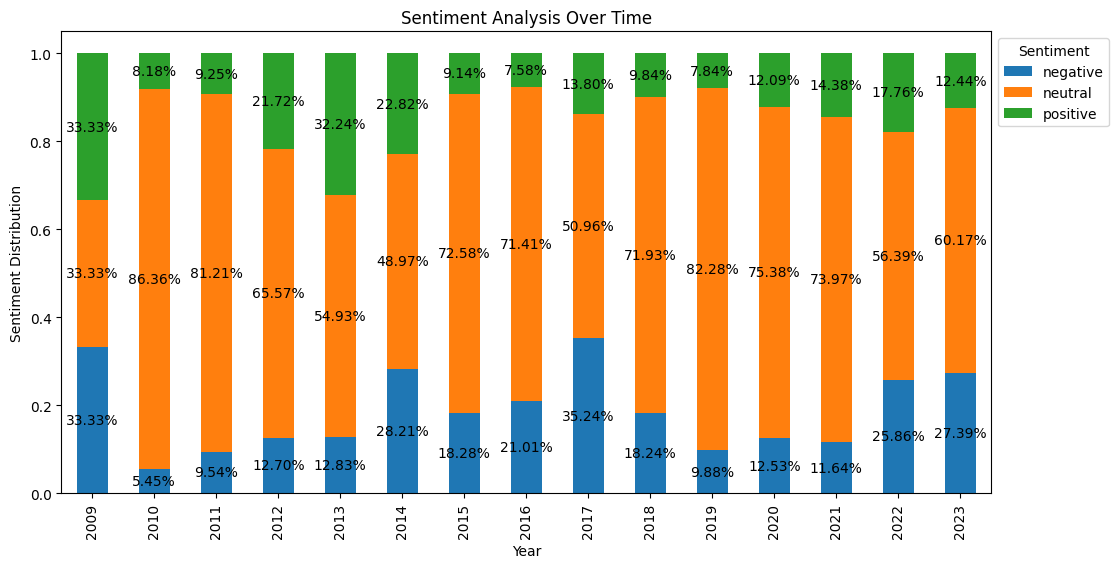

In [18]:
# Group the data by year and sentiment and calculate the counts
grouped = df.groupby([df['date'].dt.year, 'sentiment_nossplit'])['sentiment_nossplit'].count().unstack(fill_value=0)

# Create a 100% stacked bar chart
ax = grouped.div(grouped.sum(1), axis=0).plot(kind='bar', stacked=True, figsize=(12, 6))

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Sentiment Distribution')
plt.title('Sentiment Analysis Over Time')

# Show the percentage labels on each bar (only for values > 0%)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    percentage = height * 100
    if percentage > 0:
        ax.annotate(f'{percentage:.2f}%', (x + width / 2, y + height / 2), ha='center', va='center')

# Define custom legend labels and handles
legend_labels = ['negative', 'neutral', 'positive']

# Add the custom legend
ax.legend(legend_labels, title='Sentiment', loc='upper left', bbox_to_anchor=(1, 1))


# Show the plot
plt.show()

In [23]:
# Group the data by year and sentiment and calculate the counts
grouped = df.groupby([df['date'].dt.year, 'sentiment_nossplit'])['sentiment_nossplit'].count().unstack(fill_value=0)

# Calculate the percentage of each sentiment category for each year
percentage_data = grouped.div(grouped.sum(axis=1), axis=0)

# Calculate the difference between positive and negative sentiment percentages
result = percentage_data[2] - percentage_data[0]  # 2 represents positive, 0 represents negative

# Print the result
print("Percentage Difference (Positive - Negative):")
print(result)


Percentage Difference (Positive - Negative):
date
2009    0.000000
2010    0.027273
2011   -0.002890
2012    0.090164
2013    0.194079
2014   -0.053846
2015   -0.091384
2016   -0.134328
2017   -0.214437
2018   -0.084016
2019   -0.020443
2020   -0.004396
2021    0.027397
2022   -0.080997
2023   -0.149522
dtype: float64


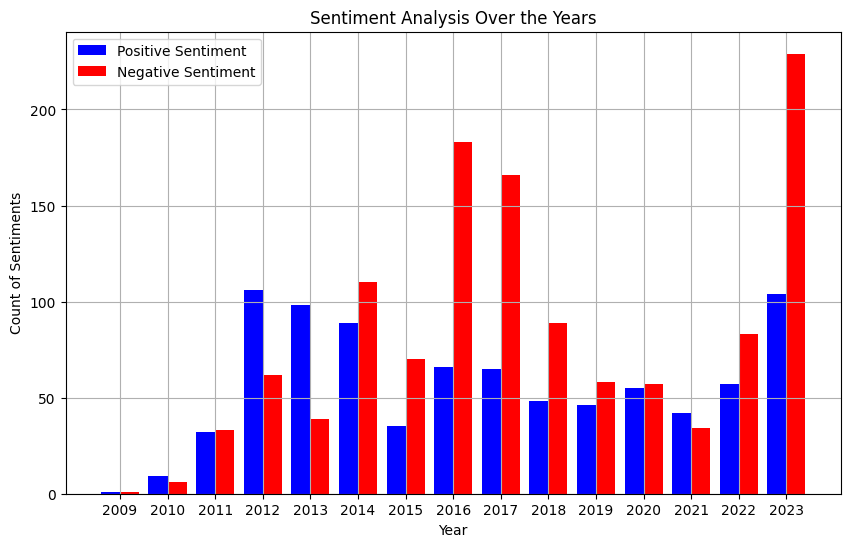

In [20]:
import numpy as np

# Filter the data for positive and negative sentiment
positive_data = df[df['sentiment_nossplit'] == 2]
negative_data = df[df['sentiment_nossplit'] == 0]

# Group data by year and count the sentiments
positive_counts_by_year = positive_data.groupby(positive_data['date'].dt.year)['sentiment_nossplit'].count()
negative_counts_by_year = negative_data.groupby(negative_data['date'].dt.year)['sentiment_nossplit'].count()

# Get a list of unique years
years = positive_counts_by_year.index.tolist()

# Set the width of each bar
bar_width = 0.4

# Create an array of indices for the years
x_indices = np.arange(len(years))

# Create a bar chart with positive and negative sentiments side by side
plt.figure(figsize=(10, 6))
plt.bar(x_indices - bar_width/2, positive_counts_by_year.values, bar_width, color='b', label='Positive Sentiment')
plt.bar(x_indices + bar_width/2, negative_counts_by_year.values, bar_width, color='r', label='Negative Sentiment')

plt.title('Sentiment Analysis Over the Years')
plt.xlabel('Year')
plt.ylabel('Count of Sentiments')
plt.xticks(x_indices, years)
plt.grid(True)

# Add a legend
plt.legend()

# Show the plot
plt.show()


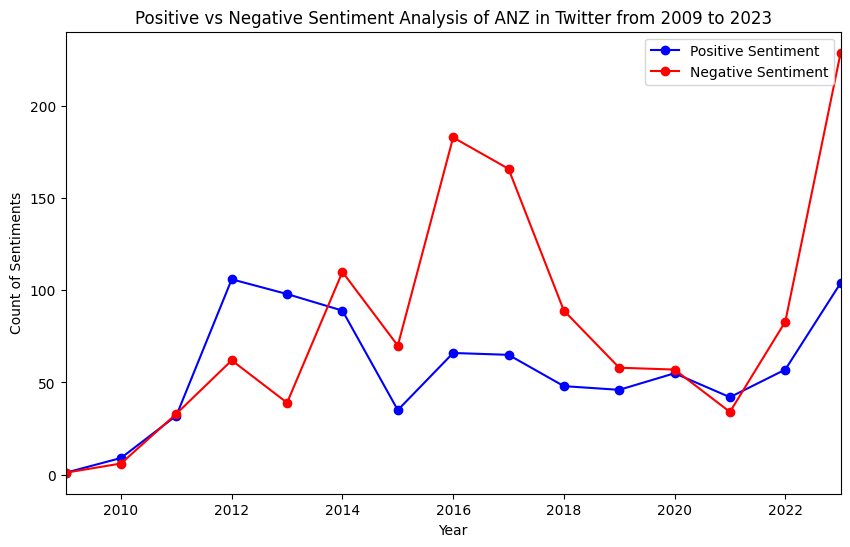

In [22]:
# Filter the data for positive sentiment (sentiment == 2)
positive_data = df[df['sentiment_nossplit'] == 2]
negative_data = df[df['sentiment_nossplit'] == 0]

# Group data by year and count the positive sentiments
positive_counts_by_year = positive_data.groupby(positive_data['date'].dt.year)['sentiment_nossplit'].count()
negative_counts_by_year = negative_data.groupby(negative_data['date'].dt.year)['sentiment_nossplit'].count()

# Create a line plot for positive sentiment
plt.figure(figsize=(10, 6))
plt.plot(positive_counts_by_year.index, positive_counts_by_year.values, marker='o', linestyle='-', color='b', label='Positive Sentiment')

# Create a line plot for negative sentiment
plt.plot(negative_counts_by_year.index, negative_counts_by_year.values, marker='o', linestyle='-', color='r', label='Negative Sentiment')

plt.title('Positive vs Negative Sentiment Analysis of ANZ in Twitter from 2009 to 2023')
plt.xlabel('Year')
plt.ylabel('Count of Sentiments')
plt.grid(False)

# Set the x-axis limits to start from 2010
plt.xlim(2009, max(positive_counts_by_year.index))

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Filter the data for positive sentiment (sentiment == 2)
positive_data = df[df['sentiment_nossplit'] == 2]

# Group data by year and count the positive sentiments
positive_counts_by_year = positive_data.groupby(positive_data['date'].dt.year)['sentiment_nossplit'].count()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(positive_counts_by_year.index, positive_counts_by_year.values, marker='o', linestyle='-', color='b')
plt.title('Positive Sentiment Over the Years')
plt.xlabel('Year')
plt.ylabel('Count of Positive Sentiments')
plt.grid(True)

# Set the x-axis limits to start from 2010
plt.xlim(2010, max(positive_counts_by_year.index))
# Show the plot
plt.show()